In [67]:
#4.2 slove

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wellbeing_dataset.csv')



df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors="coerce")

df['DAILY_STRESS'].fillna(df['DAILY_STRESS'].median(),inplace=True)
# Label encoding for categorical variables
label_encoder = LabelEncoder()

# Display basic information about the dataset
print(df.info())

# Display some sample rows to understand the data structure
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DAILY_STRESS             15972 non-null  float64
 1   SOCIAL_NETWORK           15972 non-null  int64  
 2   ACHIEVEMENT              15972 non-null  int64  
 3   BMI_RANGE                15972 non-null  int64  
 4   TODO_COMPLETED           15972 non-null  int64  
 5   DAILY_STEPS              15972 non-null  int64  
 6   SLEEP_HOURS              15972 non-null  int64  
 7   SUFFICIENT_INCOME        15972 non-null  int64  
 8   PERSONAL_AWARDS          15972 non-null  int64  
 9   TIME_FOR_HOBBY           15972 non-null  int64  
 10  WEEKLY_MEDITATION        15972 non-null  int64  
 11  AGE                      15972 non-null  object 
 12  GENDER                   15972 non-null  object 
 13  WORK_LIFE_BALANCE_SCORE  15972 non-null  float64
dtypes: float64(2), int64(1

In [43]:
# Load the dataset
df = pd.read_csv('wellbeing_dataset.csv')
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors="coerce")

df['DAILY_STRESS'].fillna(df['DAILY_STRESS'].median(),inplace=True)
# Label encoding for categorical variables
label_encoder = LabelEncoder()

# Convert Age to numeric
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Convert Gender to numeric (assuming Male=0 and Female=1)
gender_mapping = {'Male': 0, 'Female': 1}
df['GENDER'] = df['GENDER'].map(gender_mapping)

# Display the updated datatypes
print(df.dtypes)


DAILY_STRESS               float64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
DAILY_STEPS                  int64
SLEEP_HOURS                  int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_HOBBY               int64
WEEKLY_MEDITATION            int64
AGE                        float64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Find the correlation of each feature with the target variable (WLB)
wlb_correlation = correlation_matrix['WORK_LIFE_BALANCE_SCORE'].drop('WORK_LIFE_BALANCE_SCORE')
wlb_correlation = wlb_correlation.abs().sort_values(ascending=False)

# Display the correlation of features with WLB in descending order
print(wlb_correlation)


                         DAILY_STRESS  SOCIAL_NETWORK  ACHIEVEMENT  BMI_RANGE  \
DAILY_STRESS                 1.000000        0.020940    -0.110939   0.083118   
SOCIAL_NETWORK               0.020940        1.000000     0.249040   0.019927   
ACHIEVEMENT                 -0.110939        0.249040     1.000000  -0.019670   
BMI_RANGE                    0.083118        0.019927    -0.019670   1.000000   
TODO_COMPLETED              -0.163726        0.204437     0.304973  -0.061498   
DAILY_STEPS                 -0.065510        0.215797     0.185947  -0.131451   
SLEEP_HOURS                 -0.157042       -0.029722     0.045240  -0.098215   
SUFFICIENT_INCOME           -0.144565        0.123675     0.113791  -0.011816   
PERSONAL_AWARDS             -0.042519        0.209119     0.396186   0.019109   
TIME_FOR_HOBBY              -0.158110        0.200631     0.368939  -0.006108   
WEEKLY_MEDITATION           -0.218659       -0.006708     0.164670  -0.078286   
AGE                         

ACHIEVEMENT          0.561244
TODO_COMPLETED       0.545503
TIME_FOR_HOBBY       0.516967
PERSONAL_AWARDS      0.504224
DAILY_STEPS          0.422981
WEEKLY_MEDITATION    0.416171
SOCIAL_NETWORK       0.412586
SUFFICIENT_INCOME    0.403561
DAILY_STRESS         0.365394
BMI_RANGE            0.251988
SLEEP_HOURS          0.196395
GENDER               0.039881
AGE                       NaN
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DAILY_STRESS             15972 non-null  float64
 1   SOCIAL_NETWORK           15972 non-null  int64  
 2   ACHIEVEMENT              15972 non-null  int64  
 3   BMI_RANGE                15972 non-null  int64  
 4   TODO_COMPLETED           15972 non-null  int64  
 5   DAILY_STEPS              15972 non-null  int64  
 6   SLEEP_HOURS       

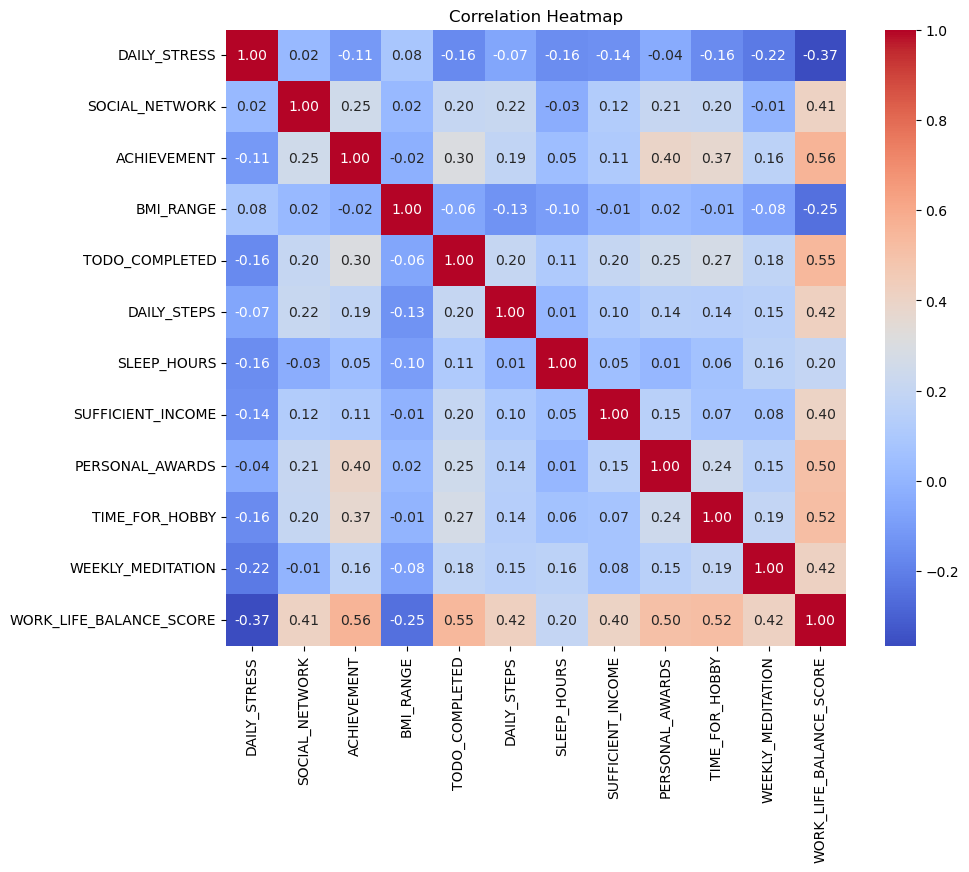

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

print(wlb_correlation)
# Drop irrelevant columns
df_cleaned = df.drop(columns=['GENDER', 'AGE'])
print(df_cleaned.info())
print(df_cleaned.shape)


# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix.shape)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



Mean Squared Error: 296.9775146051749
R-squared: 0.8505126479990518
Predicted WLB Score: 623.3539482233402
Actual WLB Score (from test set): 644.3
                   Coefficient
SUFFICIENT_INCOME    21.420230
TIME_FOR_HOBBY        3.290859
TODO_COMPLETED        3.233018
ACHIEVEMENT           3.070453
PERSONAL_AWARDS       3.035575
SLEEP_HOURS           2.837295
SOCIAL_NETWORK        2.787850
WEEKLY_MEDITATION     2.636228
DAILY_STEPS           2.594979
DAILY_STRESS         -5.601828
BMI_RANGE           -16.740577


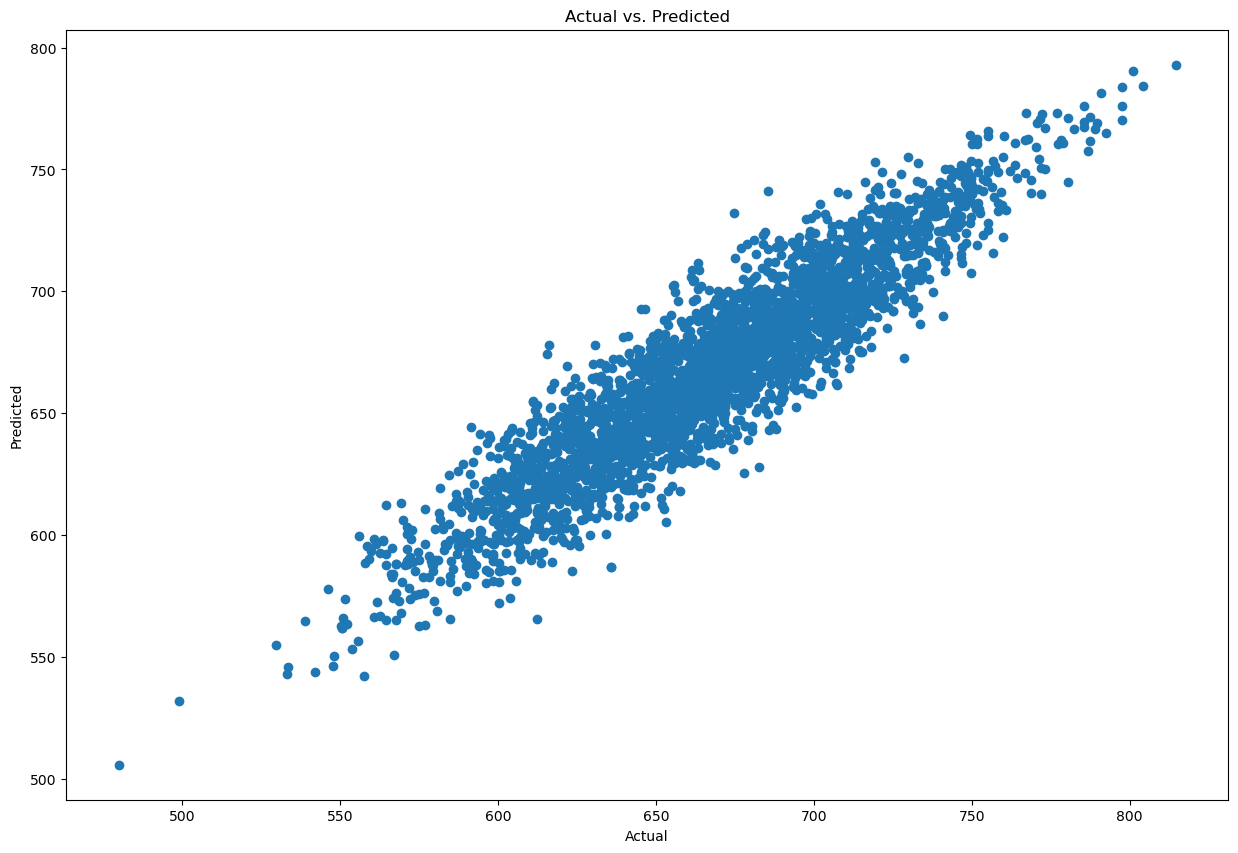

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.991      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         177490.2804
Date:                   2023-07-29 20:27        BIC:                         177574.7449
No. Observations:       15972                   Log-Likelihood:              -88734.    
Df Model:               11                      F-statistic:                 1.639e+05  
Df Residuals:           15961                   Prob (F-statistic):          0.00       
R-squared (uncentered): 0.991                   Scale:                       3920.7     
-------------------------------------------------------------------

In [66]:
#4.3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('wellbeing_dataset.csv')


df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors="coerce")

df['DAILY_STRESS'].fillna(df['DAILY_STRESS'].median(),inplace=True)
# Label encoding for categorical variables
label_encoder = LabelEncoder()

# Drop irrelevant columns
df_cleaned = df.drop(columns=['GENDER', 'AGE'])

# Convert Gender to numeric (assuming Male=0 and Female=1)
#gender_mapping = {'Male': 0, 'Female': 1}
#df_cleaned['GENDER'] = df_cleaned['GENDER'].map(gender_mapping)

# Perform label encoding for categorical features (if there are any other categorical columns)
# For this example, no additional categorical columns are present.

# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y = df_cleaned['WORK_LIFE_BALANCE_SCORE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)


# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the test results
first_test_row = X_test.iloc[[0]]  # Get the first row of the test set
predicted_wlb_score = linear_reg_model.predict(first_test_row)

print("Predicted WLB Score:", predicted_wlb_score[0])
print("Actual WLB Score (from test set):", y_test.iloc[0])


# Analyze the model's summary to determine the factors that influence the WLB score the most
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print(coefficients)

# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

# Analyze the model's summary to determine the factors that influence the WLB score the most using statsmodels
model = sm.OLS(y, X).fit()
print(model.summary2())
